## Data Visualization

- it is the visual representation of data to discover trends and patterns
- Helps in storytelling and decision making
  
## Types
- Categorical: Bar, Pie chart, etc
- Numerical: Box plot, histogram, etc
- Relatioship: Scatter plot, line plot, heatmap, Pair plot, etc

## Libraries
- Matplotlib
- Seaborn

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

-Figure :The entire canvas that holds all subplots

-Axes: A single plot

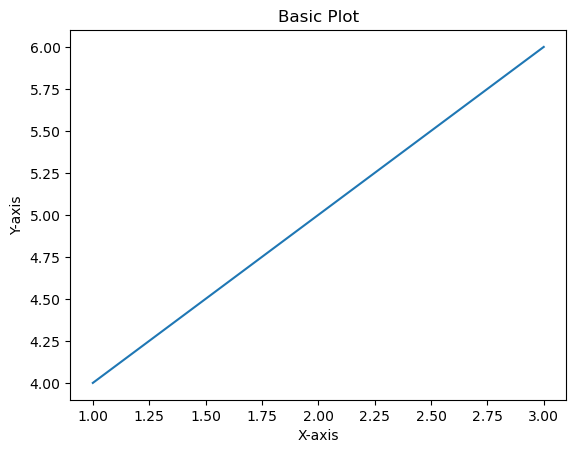

In [2]:
#Now lets create a figure with a single axes

x = [1, 2, 3]

y = [4, 5, 6]

# the fig, ax are just  conventional names, you can use any other ones but use this instead
fig, ax = plt.subplots()
ax.plot(x, y)

#give your plot a title
ax.set_title("Basic Plot")

#give your plot axis a title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

#to display the plot
plt.show() 

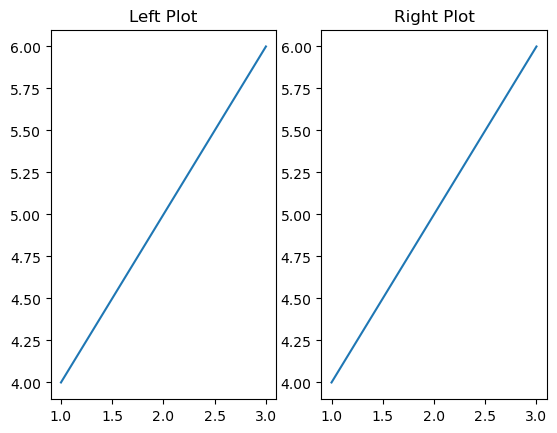

In [4]:
#create a figure with multiple subplots
#two plots side by side
fig, axes = plt.subplots(1, 2)
axes[0].plot(x, y)
axes[0].set_title("Left Plot")
axes[1].plot(x, y)
axes[1].set_title("Right Plot")

plt.show()

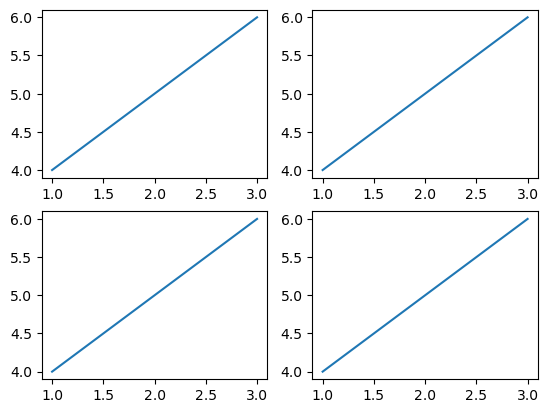

In [5]:
# to plot 2 rows, 2 column plots

fig, axes = plt.subplots(2,2)

axes[0, 0 ].plot(x, y)
axes[0, 1 ].plot(x, y)
axes[1, 0 ].plot(x, y)
axes[1, 1 ].plot(x, y)

plt.show()

## Exploratory Data Analysis

- Univariate Analysis: Examining one variable at a time

In [6]:
df = pd.read_csv(r"C:\Users\HP\Downloads\netflix_titles (2).csv")

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Numbers of Netflix titles released per year

In [8]:
#group by year column first, then count the number of title and reset index

title_per_year = df.groupby("release_year")["title"].count().reset_index()

title_per_year

,release_year,title
0,1925,1
1,1942,2
2,1943,3
3,1944,3
4,1945,4
...,...,...
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953


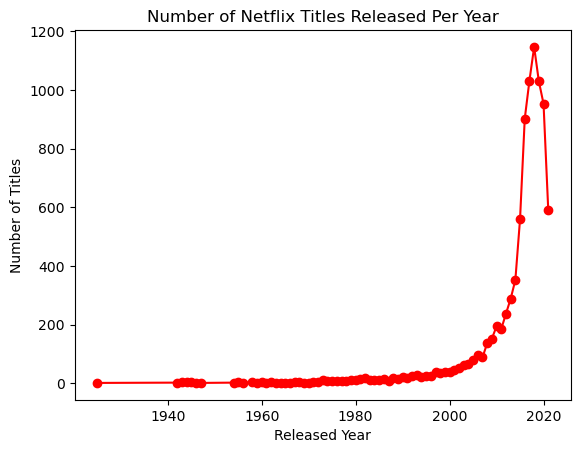

In [13]:
# to plot the release year by title, they are both numerical values, so line plot is the best 
# And when working with one plot, you dont have to specify fig, ax = plt.subplots()
# our release_year will be our x, title will be y
plt.plot(title_per_year["release_year"], title_per_year["title"], color="red", marker="o")
#we can then give it a title and the x and y label
plt.title("Number of Netflix Titles Released Per Year")
plt.xlabel("Released Year")
plt.ylabel("Number of Titles")
plt.show()

In [14]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [15]:
# it is categorical, we can't use a line plot, we will use pie or if we have more than two or three categories, we use bar chart
# Firstly, assign the value count of the type to a variable

type_counts = df["type"].value_counts()

In [16]:
# then check the index

type_counts.index

Index(['Movie', 'TV Show'], dtype='object', name='type')

In [17]:
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

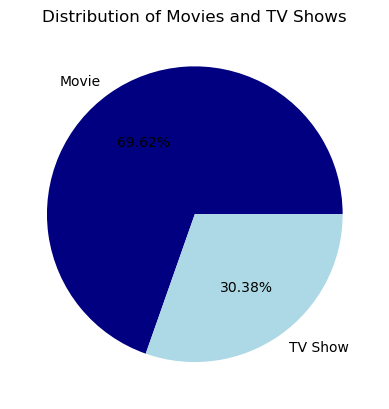

In [30]:
# The data you want to passed must be prepared just like we have prepared the "type_counts"
# then the label which is "type_counts.index", then the percentage "autopct",%1 means one whole number, 2f%% specifies that we want it in two decimal places
plt.pie(type_counts, labels=type_counts.index, autopct ='%1.2f%%', colors=["navy", "lightblue"])
plt.title("Distribution of Movies and TV Shows")
plt.show()

In [22]:
# lets explore the rating column

df["rating"].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [24]:
# we can replace the last three as unknown since it is not specific

df["rating"]= df["rating"].replace({"74 min":"Unknown", "84 min":"Unknown", "66 min":"Unknown"})

In [25]:
rating_count = df["rating"].value_counts()

rating_count

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
Unknown        3
UR             3
Name: count, dtype: int64

In [26]:
rating_count.values

array([3207, 2160,  863,  799,  490,  334,  307,  287,  220,   80,   41,
          6,    3,    3,    3])

In [27]:
rating_count.index

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'NR', 'G', 'TV-Y7-FV', 'NC-17', 'Unknown', 'UR'],
      dtype='object', name='rating')

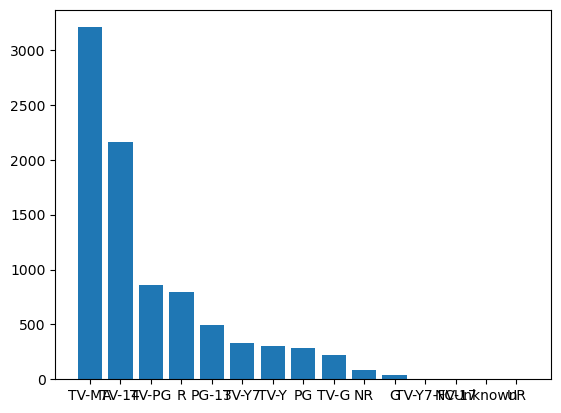

In [28]:
plt.bar(rating_count.index, rating_count.values)

plt.show()

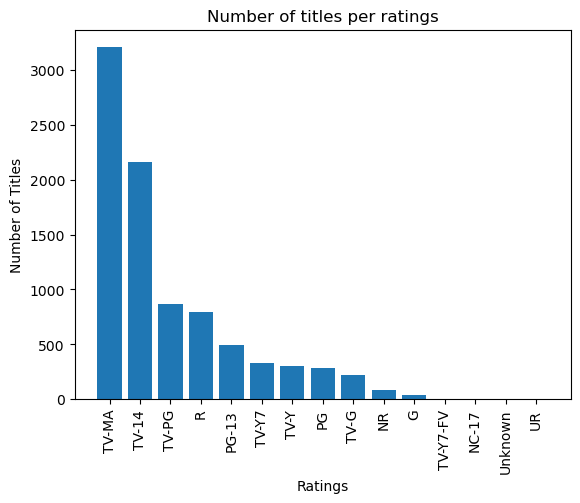

In [31]:
plt.bar(rating_count.index, rating_count.values)
# Then we can use rotate for better view of the x axis through the "xticks" function
plt.xticks(rotation=90)
plt.title("Number of titles per ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Titles")
plt.show()

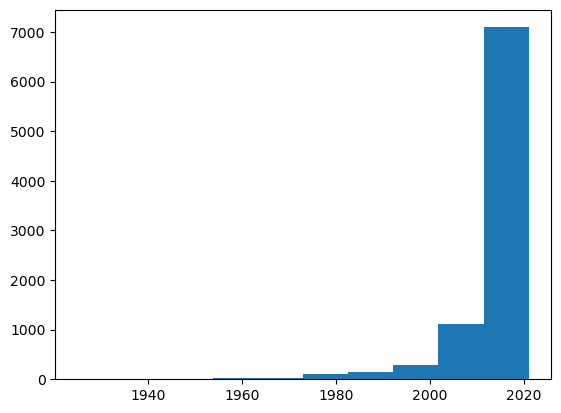

In [33]:
# Histogram shows the distribution of a numerical variable

plt.hist(df["release_year"])

plt.show()

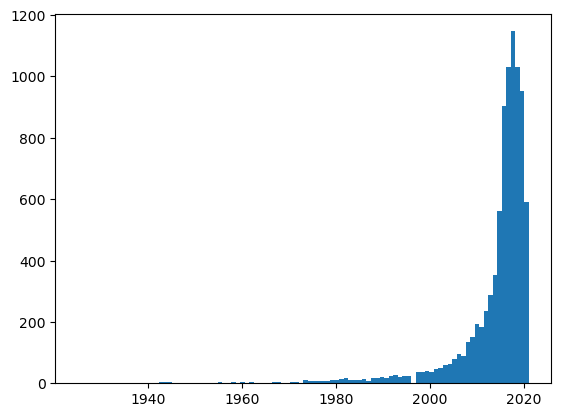

In [37]:
# to see the histogram more clearly, we increase the number of bins

plt.hist(df["release_year"], bins= 100)

plt.show()

In [35]:
df.shape

(8807, 12)

In [ ]:
# Bins means we will be dividing 8807 into 20 categories, so we have about 440 observations in each bar
# so to see clearly, number of bins will be increased to 100
#Now we can see that there is a gap, meaning there is no record of netflix title in that year

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [39]:
# lets check for cast
df["cast"].value_counts()

cast
David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                              

In [45]:
# the cast needs to be splitted because of the way the column is
#drop na and split and strip are string methods, so you must call the str class then the method, use str.split() to split the string that has comma, then explode which means each cast will be a separate entity
# Then we strip to remove extra space from strings
all_cast = df["cast"].dropna().str.split(',').explode().str.strip()

In [41]:
all_cast

1                  Ama Qamata
1                 Khosi Ngema
1               Gail Mabalane
1              Thabang Molaba
1            Dillon Windvogel
                ...          
8806         Manish Chaudhary
8806             Meghna Malik
8806            Malkeet Rauni
8806           Anita Shabdish
8806    Chittaranjan Tripathy
Name: cast, Length: 64126, dtype: object

In [46]:
all_cast.value_counts()

cast
Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Name: count, Length: 36439, dtype: int64

In [47]:
# Top 10 actors that was featured the most in netfix titles over the years

cast_count = all_cast.value_counts().head(10)

cast_count

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

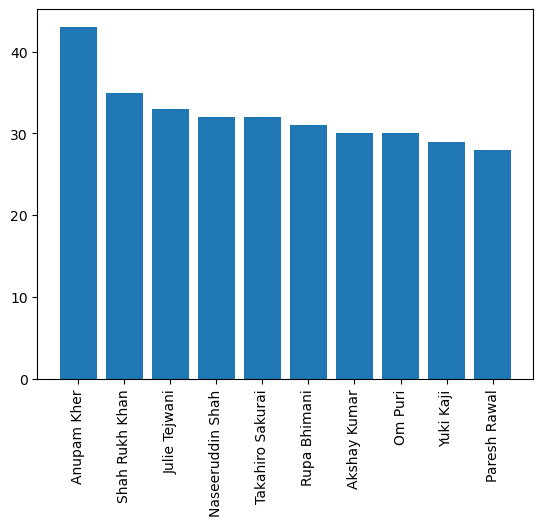

In [44]:
plt.bar(cast_count.index, cast_count.values)
plt.xticks(rotation=90)
plt.show()

## Bivariate analysis

- Examining the relationship between two variables

In [48]:
df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [49]:
# movies and tv shows released per year
# Firstly, we are grouping by two column

release_year_by_type = df.groupby(["release_year", "type"]).size()

release_year_by_type

release_year  type   
1925          TV Show      1
1942          Movie        2
1943          Movie        3
1944          Movie        3
1945          Movie        3
                        ... 
2019          TV Show    397
2020          Movie      517
              TV Show    436
2021          Movie      277
              TV Show    315
Length: 119, dtype: int64

In [51]:
#Then we unstack to seperate the column 

release_year_by_type = df.groupby(["release_year", "type"]).size().unstack()

release_year_by_type

type,Movie,TV Show
release_year,,
1925,NaN,1.0
1942,2.0,NaN
1943,3.0,NaN
1944,3.0,NaN
1945,3.0,1.0
...,...,...
2017,767.0,265.0
2018,767.0,380.0
2019,633.0,397.0


In [54]:
# Then replace Nan with 0
release_year_by_type = df.groupby(["release_year", "type"]).size().unstack(fill_value=0).reset_index()

release_year_by_type

type,release_year,Movie,TV Show
0,1925,0,1
1,1942,2,0
2,1943,3,0
3,1944,3,0
4,1945,3,1
...,...,...,...
69,2017,767,265
70,2018,767,380
71,2019,633,397
72,2020,517,436


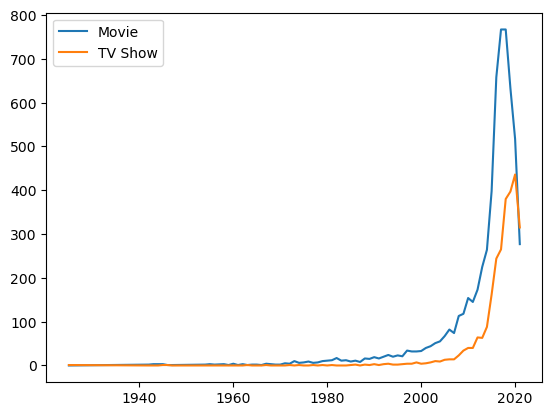

In [56]:
plt.plot(release_year_by_type["release_year"], release_year_by_type["Movie"], label="Movie")
plt.plot(release_year_by_type["release_year"], release_year_by_type["TV Show"], label="TV Show")
plt.legend()

plt.show()